# VaR by Historical Simulation

1. Install necessary libraries 
2. Define parameters (time range, tickers, portfolio value, simulations, confidence interval)
3. Download adjusted close prices (accounting for dividends and stock splits) 
4. Calculate daily log returns 
5. Assign equal weights to each asset in the portfolio
6. Calculate the historical returns for the portfolio
7. Calculate rolling sum of returns over the specified window of days 
8. Calculate VaR using historical returns 
9. Plot the results 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Define parameters
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365 * years)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
portfolio_value = 1000000
days = 5
confidence_interval = 0.95

In [3]:
# Download adjusted close prices for each ticker
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate daily log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()

In [5]:
# Assign equal weights to each asset in the portfolio
weights = np.array([1/len(tickers)] * len(tickers))

In [6]:
# Calculate historical returns for the portfolio
historical_returns = (log_returns * weights).sum(axis=1)

In [7]:
# Calculate rolling sum of returns over the specified window of days
range_returns = historical_returns.rolling(window=days).sum().dropna()

In [8]:
# Calculate VaR using historical returns
VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value
VaR

25659.597465567414

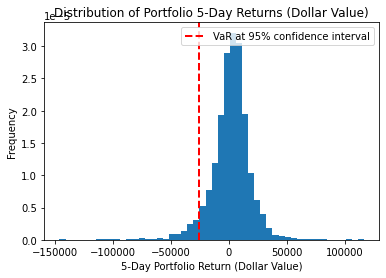

In [9]:
# Plot the results
plt.hist((range_returns * portfolio_value).dropna(), bins=50, density=True)
plt.xlabel(f'{days}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence interval')
plt.legend()
plt.show()